误差分析：针对错误样本，观察每个因数在错误样本中所占的比例来判断其重要性。通过这样的分析，使得我们可以专注解决影响模型正确率的主要问题。

dev/test sets中训练样本错误（y标注错误）时有必要手动矫正的情况：sets中分类错误的样本中错误样本所占的比例较高。

修正数据集的几点建议：
1.同时对开发集和测试集进行修正
2.修正所有标签，不要局限于模型分类错误的样本
3.训练集不用修正，这样训练出来的模型健壮性较好
4.允许开发集和测试集来自轻微不同的分布

构建机器学习模型：先快速构建第一个简单模型，然后再利用上述方法反复迭代优化。

当train set（来自网络上的猫图片）与dev/test set（手机拍摄的猫图片）不来自同一个分布的时候：

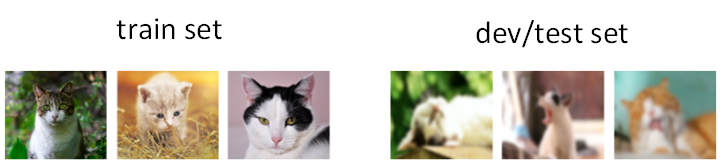

In [1]:
from IPython.display import Image
libo="C:/Users/libo/Desktop/machine learning/结构化机器学习项目/图片/"
Image(filename = libo + "2.png", width=500, height=200)

解决方法：
1.将train set和dev/test set完全混合，然后在随机选择一部分作为train set，另一部分作为dev/test set。
这样dev/test set中网络上的猫图片居多，训练的模型达不到实际应用的效果。


2.将原来的train set和一部分dev/test set组合当成train set，剩下的dev/test set分别作为dev set和test set。
实际应用效果较好。

train-dev set：“Same distribution as training set, but not used for training.”用于train set和dev/test set来源于不同分布时判断Bias and Variance

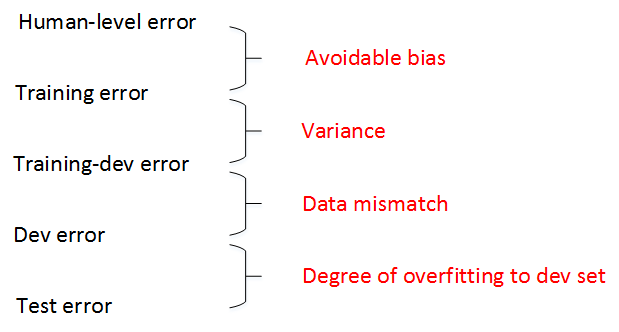

In [2]:
libo="C:/Users/libo/Desktop/machine learning/结构化机器学习项目/图片/"
Image(filename = libo + "3.png", width=500, height=200)

Data mismatch（数据不匹配）:train data 与 Dev data 不一致。

解决建议：
1.error analysis to try to understand difference between training dev/test sets
2.Make training data more similar; or collect more data similar to dev/test sets

人工数据合成：手动调节 train set，使之与Dev data 一致。

迁移学习：将已经训练好的模型的一部分知识（网络结构）直接应用到另一个类似模型中去。通常只改变样本输入、输出以及输出层的权重系数$W^{[L]}, b^{[L]}$

如果样本数量足够多，那么也可以只保留网络结构，重新训练所有层的权重系数:初始$W^{[L]}, b^{[L]}$由之前的模型训练得到，这一过程称为pre-training。之后，不断调试、优化$W^{[L]}, b^{[L]}$的过程称为fine-tuning。pre-training和fine-tuning分别对应下图中的黑色箭头和红色箭头。

迁移学习可以保留原神经网络的一部分，再添加新的网络层。

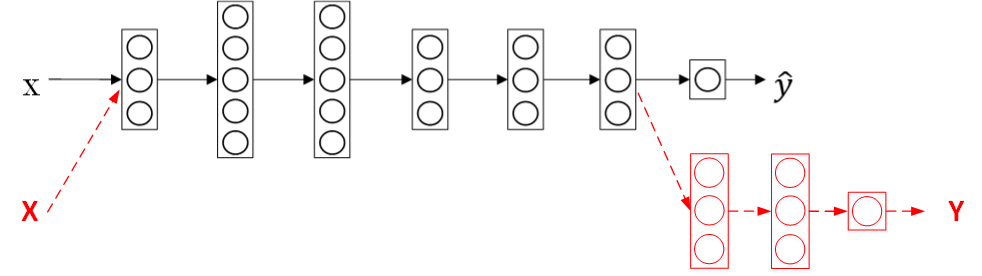

In [3]:
libo="C:/Users/libo/Desktop/machine learning/结构化机器学习项目/图片/"
Image(filename = libo + "4.png", width=500, height=200)

Multi-task learning（多任务学习）：构建的神经网络同时执行多个任务。

应用范围：各个任务之间是相似问题（例如都是图片类别检测）

Multi-task learning与Softmax regression的区别在于Softmax regression是single label的，即输出向量y只有一个元素为1；而Multi-task learning是multiple labels的，即输出向量y可以有多个元素为1。

cost function：y=$\frac1m∑_{i=1}^m∑_{j=1}^cL(\hat y^{(i)}_j,y^{(i)}_j)$

$L(\hat y^{(i)}_j,y^{(i)}_j)=−y^{(i)}_jlog \hat y^{(i)}_j−(1−y^{(i)}_j)log (1−\hat y^{(i)}_j)$



端到端（end-to-end）深度学习：将所有不同阶段的数据处理系统或学习系统模块组合在一起，用一个单一的神经网络模型来实现所有的功能，该模型只关心输入以及输出。

如果训练样本足够大，神经网络模型足够复杂，那么end-to-end模型性能比传统机器学习分块模型更好。

end-to-end深度学习有优点也有缺点。

优点：

Let the data speak

Less hand-designing of components（成分） needed

缺点：

May need large amount of data

Excludes potentially（有可能的） useful hand-designed